In [1]:
import pandas as pd
import torch
from torch.nn import functional as F

In [2]:
from steps.data_ingestion import IngestData
from steps.tokenizer import CharacterTokenizer
from steps.build_dataset import NamesDataset
from steps.model import MLP
from steps.utils import generate

In [3]:
names = IngestData(data_path="names.csv").get_data()
tokenizer = CharacterTokenizer(" ".join(names))

In [4]:
config = {}
config.update({
    'context_window': 3,
    'vocab_size' : len(tokenizer.vocab),
    'emb_size' : 2,
    'd_model' : 100,
    'epochs' : 10000
})

In [5]:
X,y = NamesDataset(context_length=config['context_window'],tokenizer=tokenizer).get_dataset(names)

In [6]:
X.shape,y.shape

(torch.Size([145813, 3]), torch.Size([145813]))

In [7]:
ff = MLP(config=config)

model params: 3584


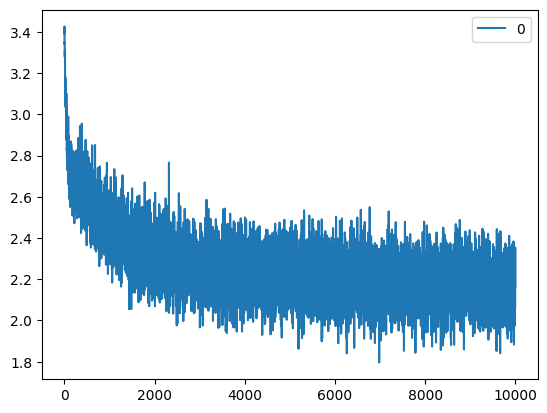

In [8]:
model,pl = ff.train(X,y)

In [20]:
torch.save(model, 'saved_models/model.pth')

In [22]:
import pickle

In [23]:

fileObj = open('tokenizer.obj', 'wb')
pickle.dump(tokenizer,fileObj)
fileObj.close()

In [24]:
fileObj = open('tokenizer.obj', 'rb')
exampleObj = pickle.load(fileObj)
fileObj.close()
print(exampleObj)

In [21]:
torch.load('saved_models/model.pth')

SimpleModel(
  (embedding): Embedding(28, 2)
  (linear): Sequential(
    (0): Linear(in_features=6, out_features=100, bias=True)
    (1): Tanh()
    (2): Linear(in_features=100, out_features=28, bias=True)
  )
)